# T-distributed Stochastic Neighbor Embedding for R (t-SNE)

### Dataset

Single cell gene expression dataset of Peripheral blood mononuclear cells (PBMCs) from a healthy donor was downloaded from [10x Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.0.0/pbmc_1k_protein_v3). Completely empty rows (genes) were filtered out, then the matrix was row-normalized. The gene-cell matrix is saved as object 'smat' in single_cell_processed_normal.RData. The tag and gene names corresponding to each row of the matrix is saved in object 'genes_remain.'

### Dependencies
This code was developed and tested in R 3.6.0. [IRkernel](https://irkernel.github.io/installation/) was used to run R on Jupyter notebook. The [Rtsne package](https://cran.r-project.org/web/packages/Rtsne/index.html) is a key dependency.

In [56]:
library('Matrix')
library('Rtsne')
library('repr') #Should get automatically installed with IRkernel; comment out if not in Jupyter notebook

In [23]:
load('single_cell_processed_normal.RData')

In [24]:
scrna = as(smat,"matrix")
n = nrow(scrna)
m = ncol(scrna)
print(paste('Number of rows/genes =',n))
print(paste('Number of columns/cells =',m))

[1] "Number of rows/genes = 2118"
[1] "Number of columns/cells = 713"


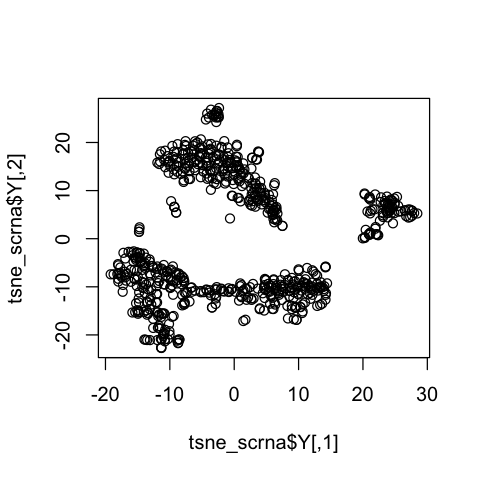

In [69]:
tsne_scrna = Rtsne(t(scrna))
options(repr.plot.width=4, repr.plot.height=4) #comment out if not in Jupyter notebook
plot(tsne_scrna$Y)

In [ ]:
nmf_sc <- nmf(scrna, 3, 'lee', seed=123)
H = coef(nmf_sc)
hardcluster_H = apply(H, 2, which.max)

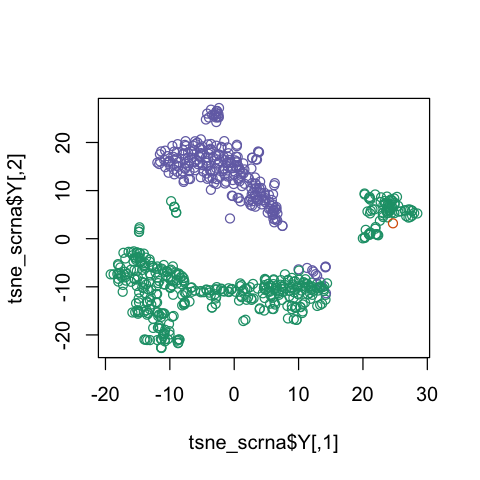

In [70]:
options(repr.plot.width=4, repr.plot.height=4) #comment out if not in Jupyter notebook
plot(tsne_scrna$Y,col=c("#1b9e77","#d95f02","#7570b3")[hardcluster_H])